In [11]:
import pickle, json
import os, sys

# 读取数据集
dic = pickle.load(open("demo/custom_prediction.pk", "rb"))
# 截取文件名
dic = {os.path.basename(k): v for k, v in dic.items()}
# VG1800标注
# vocab = json.load(open("../datasets/vg/1000/VG-dicts.json"))

# VG50标注
vocab = json.load(open("../datasets/vg/50/VG-SGG-dicts-with-attri.json"))

In [13]:
dic

{'COCO_train2014_000000580957.jpg': {'bbox': tensor([[201.0193, 152.2491, 895.5984, 598.5981],
          [733.5098, 140.4708, 891.7016, 466.8877],
          [  0.0000,   0.0000, 895.5984, 598.5981],
          [195.8549,  30.4323, 618.5768, 158.9988],
          [  8.8306,   0.0000, 643.1615, 311.2427],
          [587.9473, 344.1816, 680.1349, 423.8526],
          [648.2158,   0.0000, 842.3303, 151.3665],
          [  0.0000,   0.0000, 310.3942, 348.9901],
          [709.0192, 319.7190, 777.8430, 383.2788],
          [832.4825, 179.7368, 894.9302, 392.5671],
          [725.5261,   0.0000, 893.4548,  33.0701],
          [302.3541, 164.9957, 853.3337, 479.7177],
          [306.3219, 342.3295, 374.1559, 402.7258],
          [444.5858, 489.1533, 530.8221, 552.0708],
          [727.1722, 373.4110, 814.4803, 439.9415],
          [275.1612, 229.2211, 630.4427, 560.8195],
          [  0.0000,  58.3325, 113.1352, 279.5381],
          [  0.0000,  34.2050, 145.3083, 295.7016],
          [  0.0000, 

In [12]:
dic.keys()

dict_keys(['COCO_train2014_000000580957.jpg', 'COCO_val2014_000000000073.jpg', 'COCO_val2014_000000000074.jpg'])

In [3]:
dic[list(dic.keys())[0]].keys()

dict_keys(['bbox', 'bbox_labels', 'bbox_scores', 'rel_pairs', 'rel_labels', 'rel_scores'])

In [5]:
dic[list(dic.keys())[0]]

{'bbox': tensor([[201.0193, 152.2491, 895.5984, 598.5981],
         [733.5098, 140.4708, 891.7016, 466.8877],
         [  0.0000,   0.0000, 895.5984, 598.5981],
         [195.8549,  30.4323, 618.5768, 158.9988],
         [  8.8306,   0.0000, 643.1615, 311.2427],
         [587.9473, 344.1816, 680.1349, 423.8526],
         [648.2158,   0.0000, 842.3303, 151.3665],
         [  0.0000,   0.0000, 310.3942, 348.9901],
         [709.0192, 319.7190, 777.8430, 383.2788],
         [832.4825, 179.7368, 894.9302, 392.5671],
         [725.5261,   0.0000, 893.4548,  33.0701],
         [302.3541, 164.9957, 853.3337, 479.7177],
         [306.3219, 342.3295, 374.1559, 402.7258],
         [444.5858, 489.1533, 530.8221, 552.0708],
         [727.1722, 373.4110, 814.4803, 439.9415],
         [275.1612, 229.2211, 630.4427, 560.8195],
         [  0.0000,  58.3325, 113.1352, 279.5381],
         [  0.0000,  34.2050, 145.3083, 295.7016],
         [  0.0000, 108.2752,  94.1771, 194.8757],
         [645.0858, 277

In [14]:
vocab.keys()

dict_keys(['object_count', 'idx_to_label', 'predicate_to_idx', 'predicate_count', 'idx_to_predicate', 'label_to_idx', 'attribute_count', 'idx_to_attribute', 'attribute_to_idx'])

(565, 640)
(600, 679)
12-motorcycle, parked on, 15-street tensor(0.0475)
7-motorcycle, parked on, 15-street tensor(0.0208)
28-motorcycle, parked on, 15-street tensor(0.0187)
19-motorcycle, parked on, 15-street tensor(0.0111)
2-number, painted on, 7-motorcycle tensor(0.0049)
12-motorcycle, has, 8-tire tensor(0.0046)
1-wheel, on back of, 12-motorcycle tensor(0.0042)
1-wheel, of, 4-bike tensor(0.0037)
4-bike, has, 1-wheel tensor(0.0036)
4-bike, parked on, 15-street tensor(0.0034)
12-motorcycle, has, 0-seat tensor(0.0033)
9-number, painted on, 12-motorcycle tensor(0.0033)
2-number, painted on, 12-motorcycle tensor(0.0033)
9-number, painted on, 7-motorcycle tensor(0.0032)
23-bike, has, 8-tire tensor(0.0031)
23-bike, has, 0-seat tensor(0.0030)
2-number, on, 10-sign tensor(0.0029)
8-tire, on back of, 12-motorcycle tensor(0.0028)
9-number, on, 10-sign tensor(0.0027)
12-motorcycle, has, 1-wheel tensor(0.0025)
4-bike, has, 6-wheel tensor(0.0025)
2-number, on, 11-sign tensor(0.0023)
8-tire, of, 2

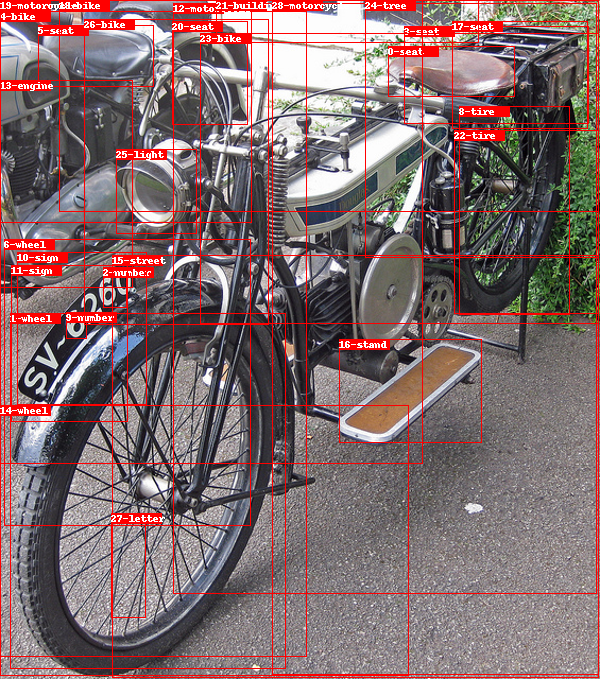

In [23]:
import torch
import json
import h5py
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

# 读取多少个边界框
box_topk = 40
# 读取多少个关系
rel_topk = 30

# 调整图片尺寸，>=600 && <=1000 || <=1000
def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)
    
# 绘制边界框
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3]) # 边界框坐标
    draw.rectangle(((x1, y1), (x2, y2)), outline=color) # 绘制边界框
    if draw_info: # 绘制边界框名称
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)

def draw_image(img_path, data):
    # 路径合并
    img_path = os.path.join("./demo_imgs", img_path)
    # 调整图片尺寸
    print(Image.open(img_path).size)
    size = get_size(Image.open(img_path).size)
    print(size)
    pic = Image.open(img_path).resize(size)
    boxes = np.array(data['bbox'][:box_topk])
    labels = data['bbox_labels']
    labels = [str(i)+"-"+vocab['idx_to_label'][str(int(x))] for i, x in enumerate(labels)]
    
    num_obj = boxes.shape[0]
    for i in range(num_obj):
        info = labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    
    all_rel_pairs = data['rel_pairs']
    all_rel_labels = data['rel_labels']
    all_rel_scores = data['rel_scores']
#     all_rel_trip_scores = data['rel_all_scores']
#     all_na_scores = torch.zeros([len(all_rel_trip_scores), 2])
#     all_na_scores[:, 0] = all_rel_trip_scores[:, 0]
#     all_na_scores[:, 1] = all_rel_trip_scores[:, 1:].sum(1)
#     all_na_scores = all_na_scores.softmax(-1)
#     all_na_scores, idxs = (all_na_scores[:, 1]*all_rel_scores).sort(descending=True)
#     all_na_scores, idxs = (all_na_scores[:, 0]).sort()
#     all_rel_pairs = all_rel_pairs[idxs]
#     all_rel_labels = all_rel_labels[idxs]
#     all_rel_scores = all_rel_scores[idxs]
    
    rel_pairs = []
    rel_labels = []
    rel_scores = []
    na_scores = []
    for i in range(len(all_rel_pairs)):
        if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
            rel_scores.append(all_rel_scores[i])
            label = labels[all_rel_pairs[i][0]] + ', ' + vocab["idx_to_predicate"][str(int(all_rel_labels[i]))] + ', ' + labels[all_rel_pairs[i][1]]
            rel_labels.append(label)

    rel_labels = rel_labels[:rel_topk]
    rel_scores = rel_scores[:rel_topk]
    for a, b in list(zip(rel_labels, rel_scores)):
        print(a, b)
    
    display(pic)
    return None
# 获取图片名
keys = list(dic.keys())
key = keys[0]
# 可视化
draw_image(key, dic[key])

11-vegetable, in, 0-bowl tensor(0.1277)
13-vegetable, in, 0-bowl tensor(0.0920)
15-vegetable, in, 0-bowl tensor(0.0920)
24-vegetable, in, 0-bowl tensor(0.0756)
12-vegetable, in, 0-bowl tensor(0.0732)
33-vegetable, in, 0-bowl tensor(0.0666)
14-vegetable, in, 0-bowl tensor(0.0642)
26-vegetable, in, 0-bowl tensor(0.0597)
21-vegetable, in, 0-bowl tensor(0.0571)
27-vegetable, in, 0-bowl tensor(0.0569)
32-vegetable, in, 0-bowl tensor(0.0519)
5-vegetable, in, 0-bowl tensor(0.0515)
30-vegetable, in, 0-bowl tensor(0.0501)
31-vegetable, in, 0-bowl tensor(0.0483)
19-vegetable, in, 0-bowl tensor(0.0445)
39-vegetable, in, 0-bowl tensor(0.0430)
35-vegetable, in, 0-bowl tensor(0.0404)
25-vegetable, in, 0-bowl tensor(0.0340)
22-vegetable, in, 0-bowl tensor(0.0333)
34-vegetable, in, 0-bowl tensor(0.0323)
8-vegetable, in, 0-bowl tensor(0.0304)
36-vegetable, in, 0-bowl tensor(0.0302)
0-bowl, above, 2-counter tensor(0.0148)
9-pizza, in, 0-bowl tensor(0.0060)
4-bowl, above, 2-counter tensor(0.0054)
9-pizza

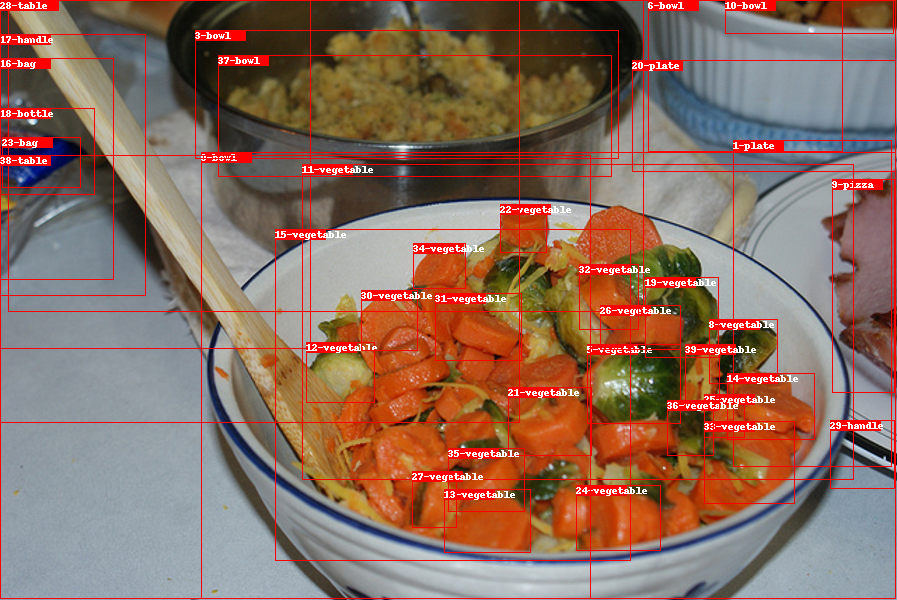

In [20]:
import torch
import json
import h5py
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

box_topk = 40
rel_topk = 30

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def draw_image(img_path, data):
    img_path = os.path.join("./demo_imgs", img_path)
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    boxes = np.array(data['bbox'][:box_topk])
    labels = data['bbox_labels']
    labels = [str(i)+"-"+vocab['idx_to_label'][str(int(x))] for i, x in enumerate(labels)]
    
    num_obj = boxes.shape[0]
    for i in range(num_obj):
        info = labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    
    all_rel_pairs = data['rel_pairs']
    all_rel_labels = data['rel_labels']
    all_rel_scores = data['rel_scores']
#     all_rel_trip_scores = data['rel_all_scores']
#     all_na_scores = torch.zeros([len(all_rel_trip_scores), 2])
#     all_na_scores[:, 0] = all_rel_trip_scores[:, 0]
#     all_na_scores[:, 1] = all_rel_trip_scores[:, 1:].sum(1)
#     all_na_scores = all_na_scores.softmax(-1)
#     all_na_scores, idxs = (all_na_scores[:, 1]*all_rel_scores).sort(descending=True)
#     all_na_scores, idxs = (all_na_scores[:, 0]).sort()
#     all_rel_pairs = all_rel_pairs[idxs]
#     all_rel_labels = all_rel_labels[idxs]
#     all_rel_scores = all_rel_scores[idxs]
    
    rel_pairs = []
    rel_labels = []
    rel_scores = []
    na_scores = []
    for i in range(len(all_rel_pairs)):
        if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
            rel_scores.append(all_rel_scores[i])
            label = labels[all_rel_pairs[i][0]] + ', ' + vocab["idx_to_predicate"][str(int(all_rel_labels[i]))] + ', ' + labels[all_rel_pairs[i][1]]
            rel_labels.append(label)

    rel_labels = rel_labels[:rel_topk]
    rel_scores = rel_scores[:rel_topk]
    for a, b in list(zip(rel_labels, rel_scores)):
        print(a, b)
    
    display(pic)
    return None

keys = list(dic.keys())
key = keys[0]
draw_image(key, dic[key])

(565, 640)
(600, 679)
12-motorcycle, parked on, 15-street tensor(0.0475)
7-motorcycle, parked on, 15-street tensor(0.0208)
28-motorcycle, parked on, 15-street tensor(0.0187)
19-motorcycle, parked on, 15-street tensor(0.0111)
2-number, painted on, 7-motorcycle tensor(0.0049)
12-motorcycle, has, 8-tire tensor(0.0046)
1-wheel, on back of, 12-motorcycle tensor(0.0042)
1-wheel, of, 4-bike tensor(0.0037)
4-bike, has, 1-wheel tensor(0.0036)
4-bike, parked on, 15-street tensor(0.0034)
12-motorcycle, has, 0-seat tensor(0.0033)
9-number, painted on, 12-motorcycle tensor(0.0033)
2-number, painted on, 12-motorcycle tensor(0.0033)
9-number, painted on, 7-motorcycle tensor(0.0032)
23-bike, has, 8-tire tensor(0.0031)
23-bike, has, 0-seat tensor(0.0030)
2-number, on, 10-sign tensor(0.0029)
8-tire, on back of, 12-motorcycle tensor(0.0028)
9-number, on, 10-sign tensor(0.0027)
12-motorcycle, has, 1-wheel tensor(0.0025)
4-bike, has, 6-wheel tensor(0.0025)
2-number, on, 11-sign tensor(0.0023)
8-tire, of, 2

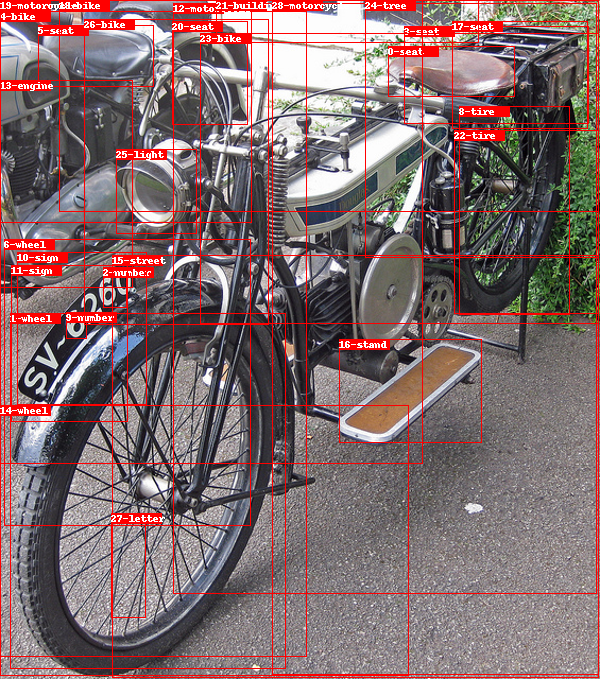

In [24]:
key = keys[1]
draw_image(key, dic[key])

(640, 426)
(901, 600)
12-person, walking on, 2-sidewalk tensor(0.2045)
12-person, walking on, 10-sidewalk tensor(0.1693)
12-person, walking on, 8-sidewalk tensor(0.1629)
23-person, walking on, 2-sidewalk tensor(0.1544)
23-person, walking on, 10-sidewalk tensor(0.1273)
23-person, walking on, 8-sidewalk tensor(0.1156)
9-person, walking on, 2-sidewalk tensor(0.0917)
36-wire, attached to, 33-pole tensor(0.0887)
11-people, walking on, 2-sidewalk tensor(0.0849)
9-person, walking on, 8-sidewalk tensor(0.0807)
9-person, walking on, 10-sidewalk tensor(0.0796)
27-sign, hanging from, 24-building tensor(0.0687)
0-dog, has, 17-tail tensor(0.0665)
11-people, walking on, 10-sidewalk tensor(0.0611)
12-person, walking on, 20-street tensor(0.0597)
0-dog, has, 5-ear tensor(0.0596)
0-dog, has, 31-eye tensor(0.0579)
11-people, walking on, 8-sidewalk tensor(0.0562)
23-person, walking on, 20-street tensor(0.0448)
0-dog, has, 28-paw tensor(0.0438)
0-dog, has, 21-leg tensor(0.0419)
0-dog, has, 22-head tensor(0

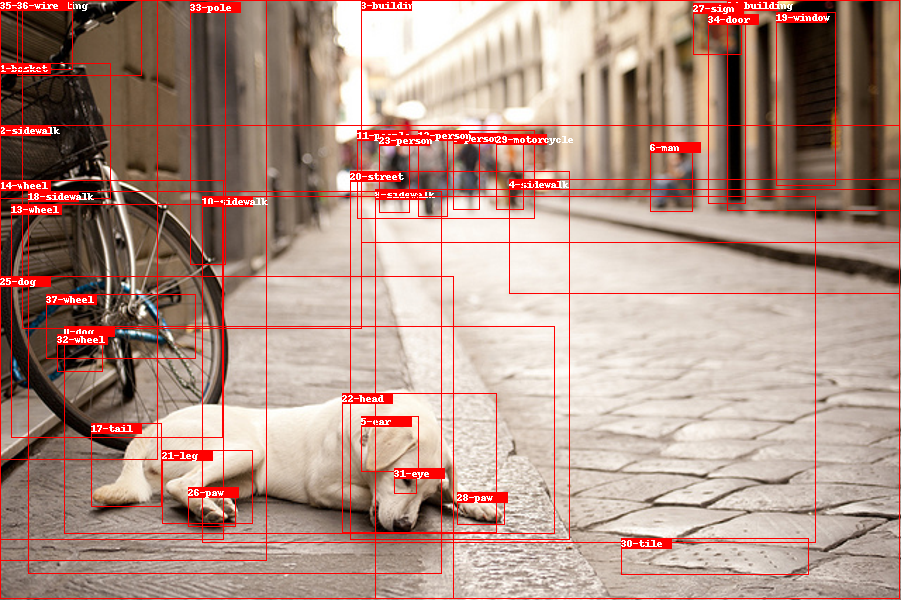

In [25]:
key = keys[2]
draw_image(key, dic[key])